In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
import os

In [2]:
watershed_lvl_fp = os.path.relpath("../datasets/reservoirs/reservoir_lvls.csv")

In [3]:
lvls_df = pd.read_csv(watershed_lvl_fp)

In [6]:
pd.to_datetime(lvls_df.Point_time.unique()).sort_values(ascending=True)
lvls_df['date'] = pd.to_datetime(lvls_df.Point_time)

In [14]:
lvls_df["year"] = lvls_df['date'].dt.year
lvls_df["month"] = lvls_df['date'].dt.month
lvls_df["day_of_year"] = lvls_df['date'].dt.day_of_year

In [15]:
lvls_df

,Point_time,AUGEVolume,AUGEASTLEVANALOG,AUGWVOLUME,AUGWESTLEVANALOG,ASHREL,SICRESVOLUME,SICRESELEVANALOG,STPALBFLW,RECRESVOLUME,...,EDRNTHFLW,EDRSTHFLW,EDRCONFLW,WDIRESVOLUME,WDIRESELEVANALOG,WDRFLW,date,year,month,day_of_year
0,02/01/2019,75.040000,585.170000,39.670000,584.650000,619.0,16.81,1125.75,48.3,47.330000,...,225.80,225.6,0.0,88.91,1146.33,959.20,2019-02-01,2019,2,32
1,02/02/2019,74.480000,584.980000,39.500000,584.380000,619.0,16.82,1125.75,64.6,47.190000,...,225.90,226.1,0.0,88.49,1146.05,967.40,2019-02-02,2019,2,33
2,02/03/2019,73.880000,584.620000,39.340000,584.210000,598.0,16.84,1125.75,68.1,47.090000,...,225.70,226.0,0.0,88.16,1145.83,965.70,2019-02-03,2019,2,34
3,02/04/2019,73.310000,584.260000,39.170000,584.040000,586.0,16.93,1125.81,62.5,46.990000,...,225.70,225.6,0.0,87.91,1145.66,966.50,2019-02-04,2019,2,35
4,02/05/2019,72.760000,583.900000,39.190000,583.850000,584.0,17.16,1126.03,57.5,46.960000,...,225.80,225.5,0.0,88.24,1145.88,960.30,2019-02-05,2019,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,12/27/2024,57.210396,573.234375,33.815323,577.837646,NaN,8.00,13.64,0.0,460.700012,...,1257.48,0.0,42.3,0.00,60.62,1125.39,2024-12-27,2024,12,362
2573,12/28/2024,57.404480,573.352722,33.961895,577.912659,NaN,9.00,13.48,0.0,503.500000,...,1257.41,0.0,43.3,0.00,60.82,1125.55,2024-12-28,2024,12,363
2574,12/29/2024,57.742203,573.491272,34.566723,578.061768,NaN,10.00,13.46,0.0,505.000000,...,1257.73,0.0,43.2,0.00,61.45,1126.05,2024-12-29,2024,12,364
2575,12/30/2024,58.072758,573.730347,36.073963,578.766418,NaN,10.00,14.73,0.0,504.800018,...,1258.34,0.0,43.3,0.00,62.33,1126.75,2024-12-30,2024,12,365


In [16]:
# some dates have duplicated data
lvls_df = lvls_df.drop_duplicates()

In [ ]:
lvls_by_date_df = lvls_df.set_index("date").sort_index(ascending=True)

In [21]:
lvls_by_date_df.index
# Ashokan 11/3/2017 = 101.54 billion gallons, rel: 12 million gallons per day
# Ashokan 11/2/2017 = 101.77 billion gallons, rel: 11 million gallons per day
# Ashokan 11/1/2017 = 101.7

DatetimeIndex(['2017-11-01', '2017-11-02', '2017-11-03', '2017-11-04',
               '2017-11-05', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='date', length=2544, freq=None)

<Axes: xlabel='AUGEVolume', ylabel='Count'>

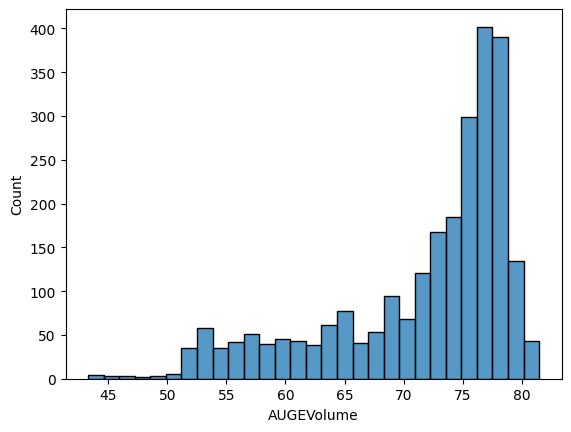

In [19]:
sns.histplot(lvls_df, x=lvls_df.AUGEVolume)

<Axes: xlabel='date', ylabel='AUGEVolume'>

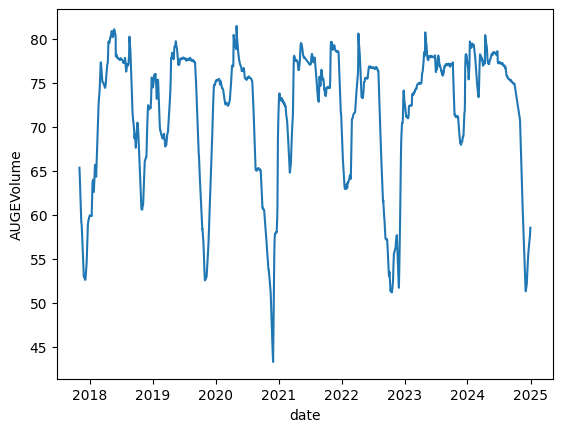

In [24]:
sns.lineplot(lvls_by_date_df, x=lvls_by_date_df.index, y="AUGEVolume")

<Axes: xlabel='day_of_year', ylabel='AUGEVolume'>

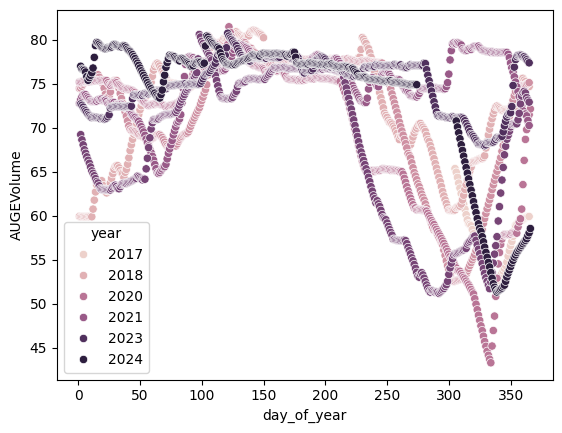

In [27]:
sns.scatterplot(lvls_by_date_df, x=lvls_by_date_df.day_of_year, y=lvls_by_date_df.AUGEVolume, hue="year")